In [93]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import seaborn as sns

#class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


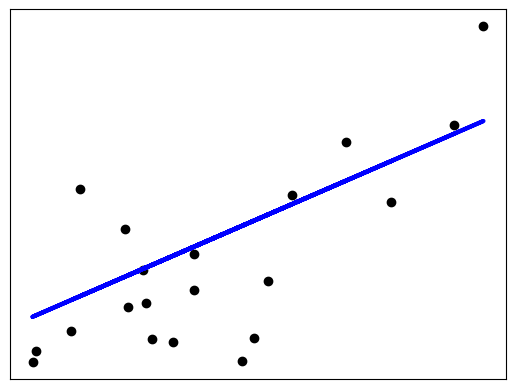

In [91]:
### 1.1.1 一元线性回归
#只有1个特征，便于在二维平面进行特征相关性画图，方便入门理解

# 加载diabetes数据集
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

#只使用1特特征，索引为2（即第3列）的特征。
diabetes_X = diabetes_X[:, np.newaxis, 2] #取索引为2的特征，且转化为二维数组。模型训练需要矩阵类型的输入

# 特征数据划分训练集和测试集
diabetes_X_train = diabetes_X[:-20] #后20个样本作为测试集，其余作为训练集
diabetes_X_test = diabetes_X[-20:]

# 标签（类别）数据划分训练集和测试集
diabetes_y_train = diabetes_y[:-20] #后20个样本作为测试集，其余作为训练集
diabetes_y_test = diabetes_y[-20:]

# 创建linear regression模型
regr = linear_model.LinearRegression()

# 模型训练
regr.fit(diabetes_X_train, diabetes_y_train)

# 预测集结果预测
diabetes_y_pred = regr.predict(diabetes_X_test)

# 模型系数
print("Coefficients: \n", regr.coef_)

# 模型评估MSE指标
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# 模型评估R2指标
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# 画图
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [94]:
### 1.1.2 多元线性回归
#多个特征，更接近实际情况。

# 加载diabetes数据集
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# 特征数据划分训练集和测试集
diabetes_X_train = diabetes_X[:-20] #后20个样本作为测试集，其余作为训练集
diabetes_X_test = diabetes_X[-20:]

# 标签（类别）数据划分训练集和测试集
diabetes_y_train = diabetes_y[:-20] #后20个样本作为测试集，其余作为训练集
diabetes_y_test = diabetes_y[-20:]

# 创建linear regression模型
regr = linear_model.LinearRegression()

# 模型训练
regr.fit(diabetes_X_train, diabetes_y_train)

# 预测集结果预测
diabetes_y_pred = regr.predict(diabetes_X_test)

# 模型系数
print("Coefficients: \n", regr.coef_)

# 模型评估MSE指标
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# 模型评估R2指标
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

##对比一元和多元线性回归结果，可知多元回归效果更好-MSE较小，R2分数较大。

Coefficients: 
 [ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]
Mean squared error: 2004.52
Coefficient of determination: 0.59


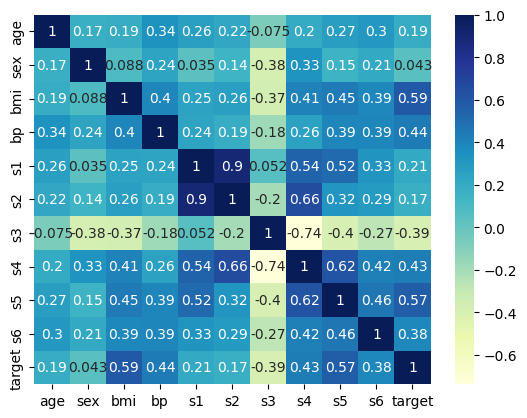

In [96]:
##<进阶> 特征分析
#通过特征相关性热力图可得到特征两两间的相关性，特征较多时可筛选出头部重要特征，在效果和性能直接折中。
#对角线为1，表示特征与自身绝对相关。非对角线表示特征与其他特征的相关性，数值越大越相关。
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True,as_frame=True) #导入dataframe格式的数据集
train_data = pd.concat([diabetes_X,diabetes_y],axis=1)
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");

In [108]:
## 删除与target标签相关性低的特征，效果影响不大

# 特征数据划分训练集和测试集
diabetes_X_train = diabetes_X[:-20] #后20个样本作为测试集，其余作为训练集
diabetes_X_test = diabetes_X[-20:]

# 标签（类别）数据划分训练集和测试集
diabetes_y_train = diabetes_y[:-20] #后20个样本作为测试集，其余作为训练集
diabetes_y_test = diabetes_y[-20:]

#删除特征sex，效果基本持平，但可以节省一些计算资源，特别是数据集较大的时候。
diabetes_X_train2 = diabetes_X_train.drop(['sex'],axis=1)
diabetes_X_test2 = diabetes_X_test.drop(['sex'],axis=1)

diabetes_X_train2.columns

Index(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [109]:
## 用删除sex特征的样本训练模型
# 创建linear regression模型
regr = linear_model.LinearRegression()

# 模型训练
regr.fit(diabetes_X_train2, diabetes_y_train)

# 预测集结果预测
diabetes_y_pred = regr.predict(diabetes_X_test2)

# 模型系数
print("Coefficients: \n", regr.coef_)

# 模型评估MSE指标
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# 模型评估R2指标
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

## 对比删除sex前后回归指标，sex特征影响不大，但是依然有一定的影响。

Coefficients: 
 [ -23.14508108  548.51789481  282.11583025 -741.27807038  441.68807391
  143.8518432   133.31577125  750.64088133   59.48078006]
Mean squared error: 2126.88
Coefficient of determination: 0.56


In [ ]:
### 总结
# 线性回归有不少改进版本，例如Ridge回归、Lasso回归等，此处只列举了最小二乘法的样例